In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.style as style

%matplotlib inline

# CARGA DE DATOS

In [2]:
datos = pd.read_csv('data/events.csv',low_memory=False)

#DANDOLE FORMATO A LOS DATOS.

datos['timestamp']=pd.to_datetime(datos['timestamp'])
datos['year'] = datos['timestamp'].dt.year
datos['month'] = datos['timestamp'].dt.month
datos['day_of_week'] = datos['timestamp'].dt.day
datos['day_of_week_name'] = datos['timestamp'].dt.weekday_name
datos['day_of_week_num'] = datos['timestamp'].dt.dayofweek
datos['hour'] = datos['timestamp'].dt.hour
datos['sku']=pd.to_numeric(datos['sku'],errors='coerce')

datos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,year,month,day_of_week,day_of_week_name,day_of_week_num,hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,5,31,Thursday,3,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,Thursday,3,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018,5,31,Thursday,3,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018,5,31,Thursday,3,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,2018,5,29,Tuesday,1,13


# BREVE EXPLORACION DE LOS DATOS

In [3]:
datos.shape

(1011288, 29)

In [4]:
datos.index

RangeIndex(start=0, stop=1011288, step=1)

In [5]:
datos.columns

Index([u'timestamp', u'event', u'person', u'url', u'sku', u'model',
       u'condition', u'storage', u'color', u'skus', u'search_term',
       u'staticpage', u'campaign_source', u'search_engine', u'channel',
       u'new_vs_returning', u'city', u'region', u'country', u'device_type',
       u'screen_resolution', u'operating_system_version', u'browser_version',
       u'year', u'month', u'day_of_week', u'day_of_week_name',
       u'day_of_week_num', u'hour'],
      dtype='object')

In [6]:
datos.values

array([[Timestamp('2018-05-31 23:38:05'), 'ad campaign hit', '0004b0a2',
        ..., 'Thursday', 3, 23],
       [Timestamp('2018-05-31 23:38:05'), 'visited site', '0004b0a2',
        ..., 'Thursday', 3, 23],
       [Timestamp('2018-05-31 23:38:09'), 'viewed product', '0004b0a2',
        ..., 'Thursday', 3, 23],
       ...,
       [Timestamp('2018-06-04 23:18:03'), 'ad campaign hit', 'ffffac8a',
        ..., 'Monday', 0, 23],
       [Timestamp('2018-06-04 23:18:03'), 'viewed product', 'ffffac8a',
        ..., 'Monday', 0, 23],
       [Timestamp('2018-06-04 23:18:10'), 'checkout', 'ffffac8a', ...,
        'Monday', 0, 23]], dtype=object)

In [7]:
datos.get_dtype_counts()

datetime64[ns]     1
float64            1
int64              5
object            22
dtype: int64

In [8]:
datos.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                float64
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
year       

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 29 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563836 non-null float64
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region           

In [10]:
datos.describe()

,sku,year,month,day_of_week,day_of_week_num,hour
count,563836.000000,1011288.0,1.011288e+06,1.011288e+06,1.011288e+06,1.011288e+06
mean,6857.155416,2018.0,4.838374e+00,1.520886e+01,2.734204e+00,1.334988e+01
std,4022.607716,0.0,1.113527e+00,8.772023e+00,1.897364e+00,7.375013e+00
min,71.000000,2018.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2842.000000,2018.0,4.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00
50%,7029.000000,2018.0,5.000000e+00,1.500000e+01,3.000000e+00,1.500000e+01
75%,9959.000000,2018.0,6.000000e+00,2.300000e+01,4.000000e+00,1.900000e+01
max,17694.000000,2018.0,6.000000e+00,3.100000e+01,6.000000e+00,2.300000e+01


# #1 - Analizar cuál es el tipo de evento predominante en el set de datos.

In [11]:
print("Hay datos vacios?",datos['event'].hasnans)

('Hay datos vacios?', False)


In [12]:
tipo_evento = datos['event'].value_counts()
print("Tipo de evento predominante",tipo_evento.head(1))

('Tipo de evento predominante', viewed product    528931
Name: event, dtype: int64)


In [13]:
tipo_evento

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

## Grafico 1

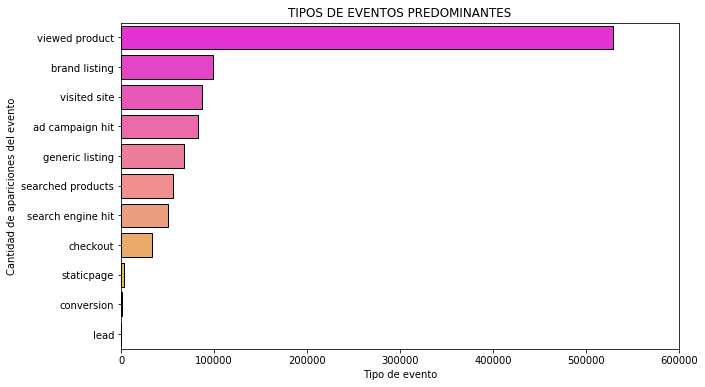

In [14]:
import matplotlib.style as style
plt.figure(figsize=(10,6))
plt.xlabel("Tipo de evento")
plt.ylabel("Cantidad de apariciones del evento")
plt.title("TIPOS DE EVENTOS PREDOMINANTES")
style.use('classic')
grafico_barras=sns.barplot(x=tipo_evento.values,y=tipo_evento.index,palette='spring')

# # 2- Calcular cuales son los 5 productos (identificados por sku) con mayor cantidad de conversiones

In [15]:
print("Hay datos vacios?",datos['sku'].size!=datos['sku'].count(),"No afectan en el analisis")
print(datos['sku'].size-datos['sku'].count())
print("")
print("Top cinco productos por \"sku\" con mas conversiones")
events_sku=datos[['sku','event']]
events_sku=events_sku[events_sku['event']=="conversion"]['sku'].value_counts().head()
events_sku

('Hay datos vacios?', True, 'No afectan en el analisis')
447452

Top cinco productos por "sku" con mas conversiones


6371.0    30
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: sku, dtype: int64

## GRAFICO 2 

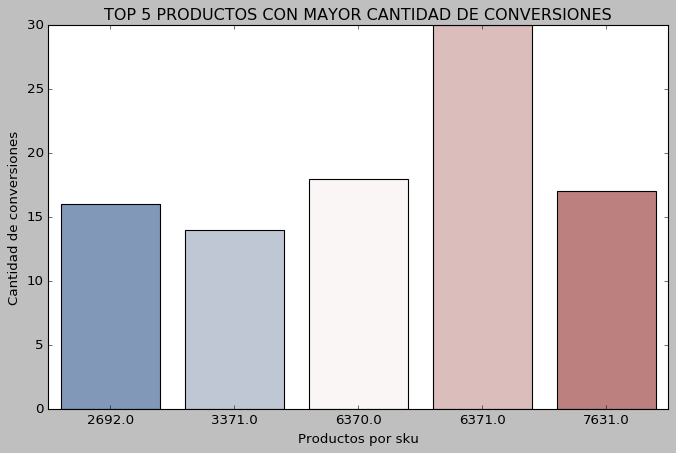

In [16]:
import matplotlib.style as style
style.use('classic')
plt.figure(figsize=(10,6))
plt.xlabel("Productos por sku")
plt.ylabel("Cantidad de conversiones")
plt.title("TOP 5 PRODUCTOS CON MAYOR CANTIDAD DE CONVERSIONES")
style.use('classic')
grafico_barras=sns.barplot(x=events_sku.index,y=events_sku.values,palette='vlag')

# #3- Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [17]:
print("Hay datos vacios?:",datos['person'].hasnans)

('Hay datos vacios?:', False)


In [18]:
print("Top ten usuarios con mas actividad")
events_user=datos.person.value_counts().head(10)
events_user

Top ten usuarios con mas actividad


71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

## GRAFICO 3

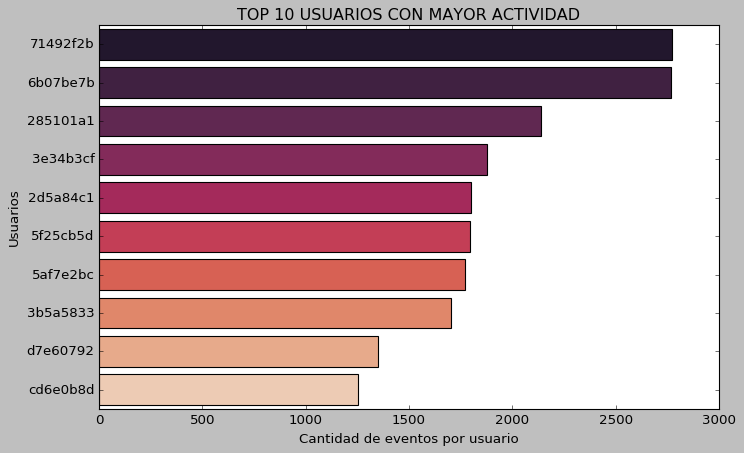

In [19]:
import matplotlib.style as style
plt.figure(figsize=(10,6))
plt.xlabel("Cantidad de eventos por usuario")
plt.ylabel("Usuarios")
plt.title("TOP 10 USUARIOS CON MAYOR ACTIVIDAD")
style.use('classic')
grafico_barras=sns.barplot(x=events_user.values,y=events_user.index,palette='rocket')

In [20]:
# SE BUSCA FILTRAR PERSONAS CIUDADES Y PAISES, DEJANDO SOLO
# DATOS VALIDOS EN BUSCA DE FORMATO PARA GEOCODE

#SE DEFINE UN DICCIONARIO CON LOS PAISES QUE APARECEN Y SUS COORDENADAS DADO QUE NO SE PUDO OBTENER DE LIBRERIAS.
#SE USAN DICHAS COORDENADAS PARA EL GRAFICO
d_paises = {'Brazil':[-8.641, -54.374],'United States':[39.789, -101.851],'Argentina':[-34.859, -64.027],'Russia':[62.021, 93.551],'Canada':[60.144, -111.846],'Netherlands':[52.368, 4.901],'Mexico':[24.095, -102.683],'Mozambique':[-17.338, 35.864],'Bangladesh':[24.180, 90.356],'Italy':[41.882, 12.609], 'Portugal':[39.043, -8.681], 'France':[48.878, 2.329], 'Venezuela':[10.454, -66.898],'United Kingdom':[51.511, -0.142], 'China':[39.912, 116.397],'French Guiana':[9.641, -13.571], 'Japan':[35.711, 139.730],'India':[25.500, 83.173],'Dominican Republic':[18.531, -69.932],'Turkey':[38.708, 35.493],'Germany':[48.230, 11.612],'Sri Lanka':[7.620, 80.760],'Paraguay':[-25.214, -57.394],'Romania':[44.474, 26.067],'Morocco':[31.576, -7.993],'Uruguay':[-32.787, -55.989],'Switzerland':[46.781, 7.982],'Poland':[52.800768, 18.426575],'South Africa':[-30.935, 24.374]}

personayciudades=datos[['person','city','country']]
personayciudadesnuevo=personayciudades.dropna()
personayciudadesnuevo= personayciudadesnuevo[personayciudadesnuevo['country']<>"Unknown"]
personayciudadesnuevo= personayciudadesnuevo[personayciudadesnuevo['city']<>"Unknown"]
eventosxpersona=personayciudadesnuevo.person.value_counts()
final_paises = personayciudadesnuevo.country.value_counts().reset_index()
final_paises.rename(columns={'index':'pais','country':'cant'},inplace=True)
#DESPRECIAMOS AQUELLOS PAISES QUE SOLO HAN GENERADO 1 VISITA
final_paises=final_paises[final_paises['cant']>1]

#IMPRIMO UNA LISTA DE PAISES PARA ARMAR EL DICCIONARIO DE COORDENADAS
print list (personayciudadesnuevo.country.unique())

final_paises['coord']=final_paises.pais.apply(lambda x: d_paises[x])
print final_paises

#CAMBIAMOS DE ESCALA PARA APRECIAR MEJOR LAS CANTIDADES
final_paises['cant']=np.log2(final_paises.cant)

# REALIZAMOS EL MAPA
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

# AGREGAMOS DE A 1 LOS MARCADORES EN EL MAPA
for i in range(0,len(final_paises)):
   folium.Circle(
      location=[final_paises.coord[i][0], final_paises.coord[i][1]],
      popup=final_paises.pais[i],
      radius=final_paises.cant[i]*50000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# GUARDAMOS EL MAPA COMO HTML
m.save('MAPA.html')


['Brazil', 'United States', 'Argentina', 'Russia', 'Canada', 'Netherlands', 'Mexico', 'Mozambique', 'Bangladesh', 'Italy', 'Portugal', 'France', 'Venezuela', 'United Kingdom', 'China', 'French Guiana', 'Japan', 'India', 'Dominican Republic', 'Turkey', 'Germany', 'Sri Lanka', 'Paraguay', 'Romania', 'Morocco', 'Uruguay', 'Switzerland', 'Poland', 'South Africa']
                  pais   cant                   coord
0               Brazil  70935       [-8.641, -54.374]
1        United States    407      [39.789, -101.851]
2            Argentina     86      [-34.859, -64.027]
3               Canada     31      [60.144, -111.846]
4                Japan     11        [35.711, 139.73]
5       United Kingdom     10        [51.511, -0.142]
6          Netherlands      9         [52.368, 4.901]
7               Poland      9  [52.800768, 18.426575]
8           Mozambique      8       [-17.338, 35.864]
9             Portugal      7        [39.043, -8.681]
10             Romania      7        [44.474

<Figure size 640x480 with 0 Axes>

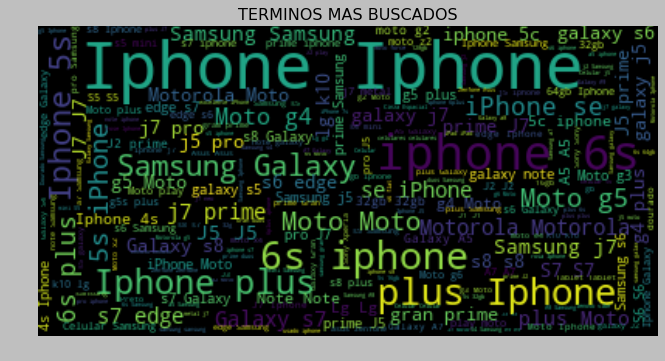

In [21]:
#SE DESEA REALIZAR UN GRAFICO DONDE LOS TERMINOS MAS BUSCADOS TIMEN MAYOR TAMANO CON RESPECTO A LOS DEMAS

raw_str = datos.search_term.str.cat(sep='|||')
wordcloud = WordCloud( max_words=5000,margin=0).generate(raw_str)
plt.figure()
plt.figure(figsize=(10,6))
plt.title("TERMINOS MAS BUSCADOS")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

# CHECKOUT PROMEDIO DE LAS HORAS DEL DIA

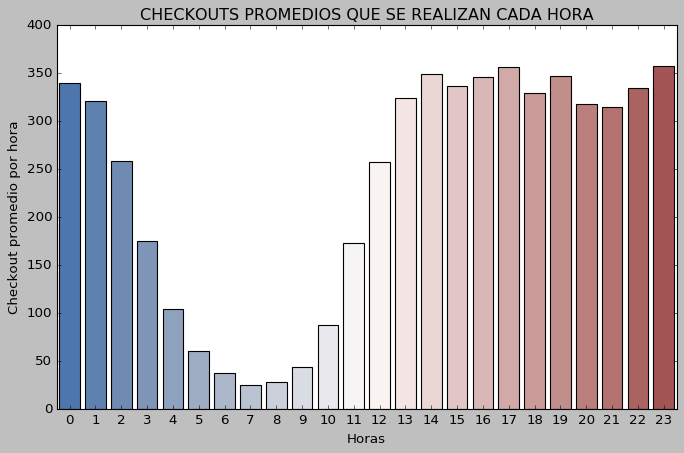

In [22]:
#SE PROCEDERA A CALCULAR EL CHECKOUT PROMEDIO DE LAS HORAS DEL DIA

compras_horas=datos[datos['event']=='checkout']['hour'].value_counts().reset_index()
compras_horas=compras_horas.rename(index=str, columns={"index": "hora", "hour":"checkout"})
compras_horas=compras_horas.sort_values(by=['hora'])
compras_horas['checkout']=compras_horas.checkout/6
style.use('classic')
plt.figure(figsize=(10,6))
plt.xlabel("Horas")
plt.ylabel("Checkout promedio por hora")
plt.title("CHECKOUTS PROMEDIOS QUE SE REALIZAN CADA HORA")
style.use('classic')
grafico_barras=sns.barplot(x=compras_horas.hora.values,y=compras_horas.checkout.values,palette='vlag')


# CHECKOUT POR MES

   mes  convxmes
5    1        63
4    2        74
2    3       265
1    4       316
0    5       351
3    6       103
   mes  checkoutxmes
5    1           331
4    2           441
3    3          1386
2    4          1965
0    5         15645
1    6         13967


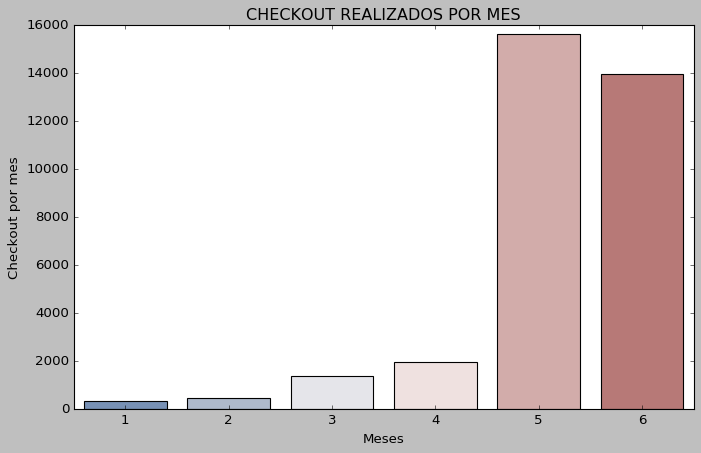

In [23]:
#CANTIDAD DE CHECKOUT REALIZADOS EN DICHOS MESES

checkout_meses=datos[datos['event']=='checkout']['month'].value_counts().reset_index()
checkout_meses=checkout_meses.rename(index=str, columns={"index": "mes", "month":"checkoutxmes"})
checkout_meses=checkout_meses.sort_values(by=['mes'])

conversion_meses=datos[datos['event']=='conversion']['month'].value_counts().reset_index()
conversion_meses=conversion_meses.rename(index=str, columns={"index": "mes", "month":"convxmes"})
conversion_meses=conversion_meses.sort_values(by=['mes'])
print conversion_meses
print checkout_meses

style.use('classic')
plt.figure(figsize=(10,6))
plt.xlabel("Meses")
plt.ylabel("Checkout por mes")
plt.title("CHECKOUT REALIZADOS POR MES")
style.use('classic')

sns.barplot(x=checkout_meses.mes.values,y=checkout_meses.checkoutxmes.values,palette='vlag')

#sns.barplot(x=conversion_meses.mes.values,y=conversion_meses.convxmes.values,palette='rocket')


In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 29 columns):
timestamp                   1011288 non-null datetime64[ns]
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563836 non-null float64
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region           

# Pruebas

In [25]:
#agged = datos.groupby(['condition', 'color']).mean().sort_index().reset_index()
#g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['condition', 'color'],size=5, aspect=.65)
#g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

In [26]:
#g = sns.FacetGrid(datos, col='color', hue='color', col_wrap=4)
#g.map(sns.regplot, 'model', 'person');

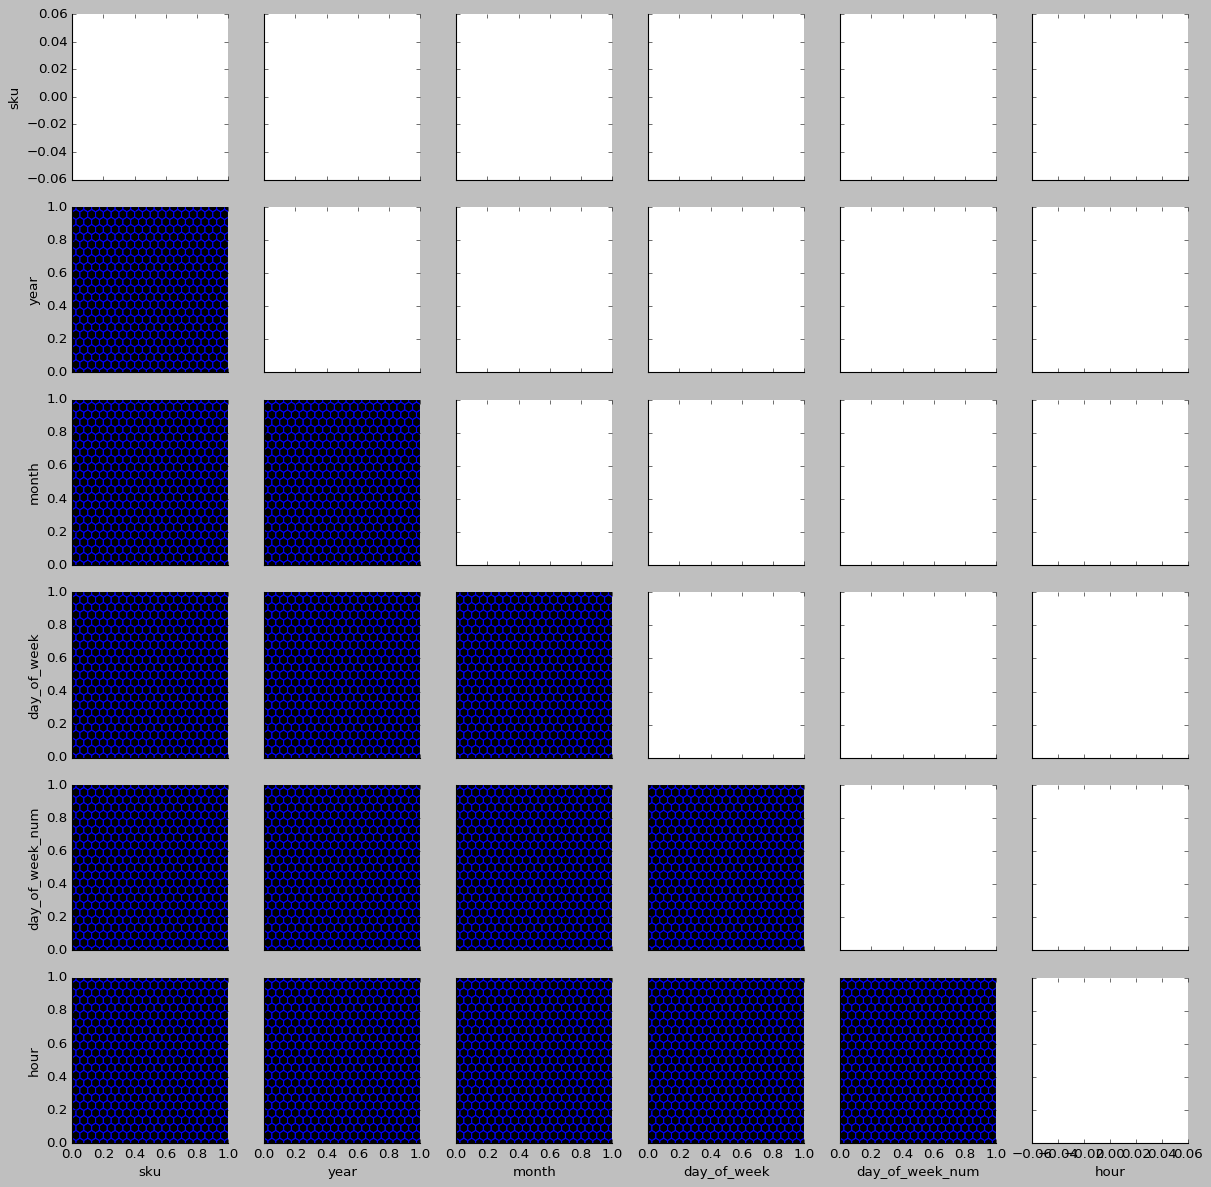

In [27]:
#PRUEBA PARA GRAFICAR VARIOS TIPOS DE DATOS NUMERICOS - NO USADO -

def core(df, a=.05):
    mask = (df > df.quantile(a)).all(1) & (df < df.quantile(1 - a)).all(1)
    return df[mask]

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(datos.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);